In [2]:
ll

total 248
-rw-rw-r-- 1 xu 197357 1月  19  2011 abalone.txt
-rw-rw-r-- 1 xu   5600 1月   8  2011 ex0.txt
-rw-rw-r-- 1 xu   5600 1月  18  2011 ex1.txt
-rw-rw-r-- 1 xu   7590 12月 20  2011 Old_regression.py
-rw-rw-r-- 1 xu   8523 12月 22  2011 regression.py
-rw-rw-r-- 1 xu   6972 12月 22  2011 regression.pyc
drwxrwxr-x 2 xu   4096 12月 19  2011 setHtml/
-rw-rw-r-- 1 xu     72 5月  16 20:15 预测数值型数据回归.ipynb


In [3]:
cat regression.py




















































































































































































































    print "with constant term: ",-1*sum(multiply(meanX,unReg)) + mean(yMat)

In [49]:
from numpy import linalg,mat,corrcoef
import numpy as np
import matplotlib.pyplot as plt

def loadDataSet(fileName):      #general function to parse tab -delimited floats
    numFeat = len(open(fileName).readline().split('\t')) - 1 #get number of fields 
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [35]:
def standRegres(xArr, yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print('this matrix is singlue,cannot do inverse')
        return 
    ws = xTx.I*(xMat.T*yMat)
    return ws

In [36]:
xArr,yArr = loadDataSet('ex0.txt')

In [18]:
xTx =mat(xArr).T*mat(xArr)

In [20]:
xTx

matrix([[ 200.        ,   97.6638    ],
        [  97.6638    ,   64.76838373]])

In [19]:
linalg.det(xTx)

3415.4589150724032

In [22]:
200*64.768383-97.6638*97.6638

3415.458769560002

In [27]:
xTx

matrix([[ 200.        ,   97.6638    ],
        [  97.6638    ,   64.76838373]])

In [32]:
xTx.I*xTx

matrix([[  1.00000000e+00,   6.26836077e-17],
        [ -2.05714313e-16,   1.00000000e+00]])

In [26]:
1/200

0.005

In [29]:
m = np.matrix('[1, 2; 3, 4]'); m

matrix([[1, 2],
        [3, 4]])

In [31]:
m.getI()*m

matrix([[  1.00000000e+00,   0.00000000e+00],
        [  1.11022302e-16,   1.00000000e+00]])

In [37]:
ws = standRegres(xArr,yArr)

In [38]:
ws

matrix([[ 3.00774324],
        [ 1.69532264]])

In [39]:
xMat = mat(xArr);
yMat = mat(yArr)
yHat = xMat*ws

In [42]:
fig = plt.figure()

In [43]:
ax = fig.add_subplot(111)

In [44]:
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])

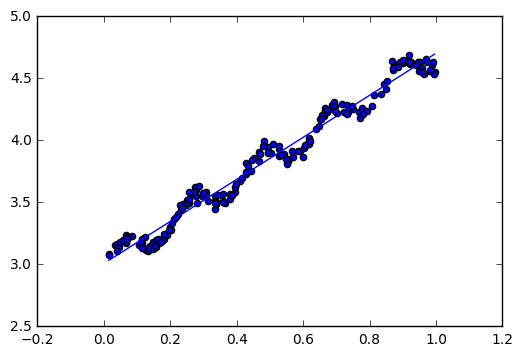

In [45]:
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*ws
ax.plot(xCopy[:,1],yHat)
plt.show()

In [68]:
corrcoef(yHat.T,yHat.T)

array([[ 1.,  1.],
       [ 1.,  1.]])

In [66]:
yHat.T.shape

(1, 200)

In [59]:
yMat.shape

(1, 200)

In [63]:
corrcoef?